In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression,LogisticRegression

In [3]:
credit = pd.read_csv("D:\\Data Science\\logistic regression\\credit_record.csv")

In [4]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,LogisticRegression


In [7]:
train = pd.read_csv("D:\\Data Science\\logistic regression\\hackathon\\train_ctrUa4K.csv")
test = pd.read_csv("D:\\Data Science\\logistic regression\\hackathon\\test.csv")

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
sample_submission = pd.read_csv("D:\\Data Science\\logistic regression\\hackathon\\sample_submission.csv")
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [17]:
train['source']='train'
test['source']='test'

In [19]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [21]:
df= pd.concat([train,test])

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test


In [82]:
Numerical_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(exclude=np.number).drop(columns = ['Loan_Status'])

In [32]:
Numerical_columns.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
dtype: int64

In [33]:
categorical_columns.isna().sum()

Loan_ID           0
Gender           24
Married           3
Dependents       25
Education         0
Self_Employed    55
Property_Area     0
source            0
dtype: int64

In [45]:
categorical_columns.groupby(by=['Property_Area','Education']).count()

Loan_ID  Gender  Married  Dependents  \
Property_Area Education                                            
Rural         Graduate          216     213      216         214   
              Not Graduate       74      70       74          73   
Semiurban     Graduate          274     264      272         265   
              Not Graduate       75      74       75          73   
Urban         Graduate          273     267      272         264   
              Not Graduate       69      69       69          67   

                            Self_Employed  source  
Property_Area Education                            
Rural         Graduate                204     216  
              Not Graduate             68      74  
Semiurban     Graduate                261     274  
              Not Graduate             71      75  
Urban         Graduate                255     273  
              Not Graduate             67      69

In [46]:
df['Gender'] = df.groupby(by=['Property_Area','Education'])['Gender'].transform(lambda x :x.fillna(x.mode()[0]))
df['Married'] = df.groupby(by=['Property_Area','Education'])['Married'].transform(lambda x :x.fillna(x.mode()[0]))
df['Dependents'] = df.groupby(by=['Property_Area','Education'])['Dependents'].transform(lambda x :x.fillna(x.mode()[0]))
df['Self_Employed'] = df.groupby(by=['Property_Area','Education'])['Self_Employed'].transform(lambda x :x.fillna(x.mode()[0]))


In [47]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [50]:
categorical_columns.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
source           0
dtype: int64

In [81]:
Numerical_columns.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
dtype: int64

In [56]:
Numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0


In [63]:
df.groupby(by=['Self_Employed','Education','Property_Area']).mean()

ApplicantIncome  CoapplicantIncome  \
Self_Employed Education    Property_Area                                       
No            Graduate     Rural              5376.530726        1952.581676   
                           Semiurban          5186.713115        1635.106557   
                           Urban              5531.743902        1593.076423   
              Not Graduate Rural              3980.820896        1308.164179   
                           Semiurban          3208.661538        1333.061538   
                           Urban              3192.426230        1354.032787   
Yes           Graduate     Rural              6461.648649        1685.297297   
                           Semiurban          8556.100000        1007.233333   
                           Urban              7041.925926        2082.629630   
              Not Graduate Rural              4813.285714        1248.714286   
                           Semiurban          5279.300000         904.300000   
                           Urban              6276.875000         953.125000   

                                          LoanAmount  Loan_Amount_Term  \
Self_Employed Education    Property_Area                                 
No            Graduate     Rural          151.159091        344.875000   
                           Semiurban      145.117155        348.172840   
                           Urban          142.579832        339.012552   
              Not Graduate Rural          119.046875        349.687500   
                           Semiurban      117.384615        337.333333   
                           Urban          113.232143        330.508475   
Yes           Graduate     Rural          175.750000        333.405405   
                           Semiurban      173.000000        333.103448   
                           Urban          173.518519        344.444444   
              Not Graduate Rural          141.571429        334.285714   
                           Semiurban      129.900000        354.000000   
                           Urban          124.875000        317.142857   

                                          Credit_History  
Self_Employed Education    Property_Area                  
No            Graduate     Rural                0.818182  
                           Semiurban            0.832599  
                           Urban                0.878924  
              Not Graduate Rural                0.803279  
                           Semiurban            0.830508  
                           Urban                0.701754  
Yes           Graduate     Rural                0.885714  
                           Semiurban            0.892857  
                           Urban                0.833333  
              Not Graduate Rural                0.714286  
                           Semiurban            1.000000  
                           Urban                0.875000

In [65]:
df['LoanAmount'] = df.groupby(by=['Self_Employed','Education','Property_Area'])['LoanAmount'].transform(lambda x:x.fillna(x.mean()))
df['Loan_Amount_Term'] =df.groupby(by=['Self_Employed','Education','Property_Area'])['Loan_Amount_Term'].transform(lambda x:x.fillna(x.mean()))
df['Credit_History'] = df.groupby(by=['Self_Employed','Education','Property_Area'])['Credit_History'].transform(lambda x:x.fillna(x.mean()))

In [66]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

<AxesSubplot:>

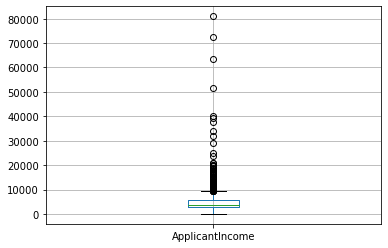

In [73]:
df.boxplot(column ='ApplicantIncome')

In [67]:
Numerical_columns.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

<AxesSubplot:>

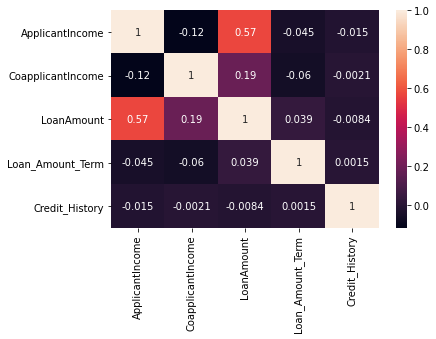

In [75]:
corr_ = train.corr()
sns.heatmap(corr_,annot=True)

In [83]:
X = Numerical_columns
#X = train.select_dtypes(include=np.number)
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,ApplicantIncome
1,CoapplicantIncome
2,LoanAmount
3,Loan_Amount_Term
4,Credit_History


In [84]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]


In [85]:
vif_data

,features,VIF
0,ApplicantIncome,2.810676
1,CoapplicantIncome,1.481370
2,LoanAmount,6.873275
3,Loan_Amount_Term,7.890175
4,Credit_History,5.503323


In [86]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [88]:
test.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [91]:
train.drop(columns=['source'],inplace = True)
test.drop(columns=['source'],inplace = True)

C:\Users\Thiyaneshwaran\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.000000,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.000000,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.000000,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.878924,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.000000,Urban,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.000000,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.000000,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,0.832599,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.000000,Rural,NaN


In [93]:
df_numbers = df.select_dtypes(include=np.number)
df_categories = df.select_dtypes(exclude=np.number).drop(columns=['Loan_ID','Loan_Status','source'])

In [95]:
df_categories_encoded = pd.get_dummies(df_categories)
df_categories_encoded

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [96]:
df_final = pd.concat([df_numbers,df_categories_encoded,df[['Loan_ID','Loan_Status','source']]],axis = 1)

In [97]:
df_final

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status,source
0,5849,0.0,142.579832,360.0,1.000000,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001002,Y,train
1,4583,1508.0,128.000000,360.0,1.000000,0,1,0,1,0,...,1,0,1,0,1,0,0,LP001003,N,train
2,3000,0.0,66.000000,360.0,1.000000,0,1,0,1,1,...,1,0,0,1,0,0,1,LP001005,Y,train
3,2583,2358.0,120.000000,360.0,1.000000,0,1,0,1,1,...,0,1,1,0,0,0,1,LP001006,Y,train
4,6000,0.0,141.000000,360.0,1.000000,0,1,1,0,1,...,1,0,1,0,0,0,1,LP001008,Y,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.000000,360.0,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,1,LP002971,NaN,test
363,4158,709.0,115.000000,360.0,1.000000,0,1,0,1,1,...,1,0,1,0,0,0,1,LP002975,NaN,test
364,3250,1993.0,126.000000,360.0,0.832599,0,1,1,0,1,...,1,0,1,0,0,1,0,LP002980,NaN,test
365,5000,2393.0,158.000000,360.0,1.000000,0,1,0,1,1,...,1,0,1,0,1,0,0,LP002986,NaN,test


In [98]:
df_final.to_excel("Pre_processed_TG_Logistic.xlsx",index = False)